In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import os
from math import sqrt as sqrt
import numpy as np
import itertools
from torch.autograd import Function
import torch.nn.init as init
from ssd_project.model import ssd
from ssd_project.functions.detection import *
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import os
os.chdir(r"C:/Users/Xiaorang/Desktop/Project/SSD_FacadeParsing/")

In [3]:
best_model = torch.load("./saved_models/Best_model_ssd300.pth.tar")
model = ssd.build_ssd(num_classes = 4)
model.load_state_dict(best_model["model_state_dict"])
device = "cuda"
model = model.to(device)

In [4]:
epochs_trained = best_model["epoch"]
best_avg_loss = best_model["loss"]
t_loss_bvals = best_model["training_losses_batch_values"]
t_loss_bavgs = best_model["training_losses_batch_avgs"]
v_loss_bvals = best_model["validation_losses_batch_values"]
v_loss_bavgs = best_model["validation_losses_batch_avgs"]

In [5]:
best_avg_loss

3.3953616943359375

In [6]:
imgs = glob.glob("./data/test_images/*")
imgs.sort()

In [21]:
img, bboxes, labels, scores = predict_objects(model, imgs[8], min_score=0.2, max_overlap = 0.01, top_k=200)

In [22]:
print(imgs[8], bboxes, labels, scores)

./data/test_images\gsv1005.jpg tensor([[  7.8159,   7.3263, 476.3523, 250.8308],
        [306.9830, 138.8782, 341.2104, 173.8382],
        [254.1952, 137.7948, 290.6262, 174.6351],
        [152.3696, 125.7892, 184.9427, 159.7978],
        [351.0766,  65.8704, 399.0552, 110.8137],
        [101.0439, 125.5305, 134.6230, 160.0646],
        [ 98.5447,  82.3431, 137.4916, 121.6531],
        [379.0795, 122.6195, 421.1110, 162.8340],
        [202.6600, 124.6856, 237.7827, 160.8033],
        [277.5206,  81.7282, 318.8951, 122.5096],
        [ 12.9213,  38.4309,  67.2549,  84.0114],
        [226.2953,  81.9207, 266.4350, 122.1213],
        [ 43.7766, 135.1878,  89.4352, 176.7733],
        [150.3938,  83.1130, 187.5076, 121.1613],
        [347.8600,  12.0574, 401.4356,  56.8949]], grad_fn=<MulBackward0>) ['building', 'window', 'window', 'window', 'window', 'window', 'window', 'window', 'window', 'window', 'window', 'window', 'window', 'window', 'window'] [0.9 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 

In [31]:
annotated_img = draw_detected_objects(imgs[8], bboxes, labels, scores)

In [32]:
img = FT.to_pil_image(annotated_img)

In [35]:
img.type()

AttributeError: 'Image' object has no attribute 'type'

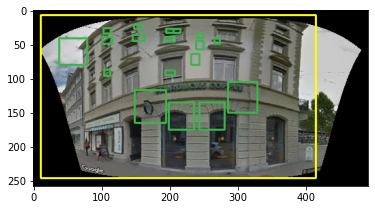

In [33]:
#imgplot = plt.imshow(annotated_img)
imgplot = plt.imshow(img)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (397,) and (401,)

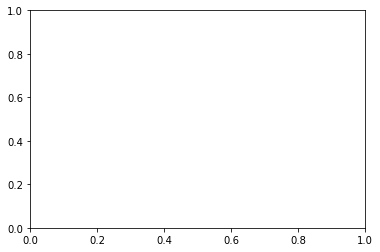

In [19]:
epochs_arr = list(range(epochs_trained+1))
plt.plot(epochs_arr, t_loss_bavgs, label = "Training Average Loss Per Epoch")
plt.plot(epochs_arr, v_loss_bavgs, label = "Validation Average Loss Per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


ValueError: x and y must have same first dimension, but have shapes (397,) and (401,)

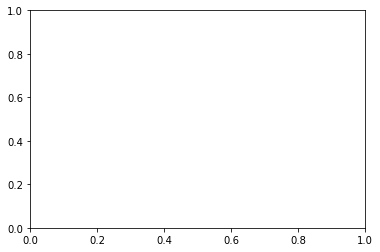

In [20]:
epochs_arr = list(range(epochs_trained+1))
plt.plot(epochs_arr, t_loss_bvals, label = "Training Random Value Loss Per Epoch")
plt.plot(epochs_arr, v_loss_bvals, label = "Validation Random Value Loss Per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()